Name : W. K. D. D. Senuruk  
## Spatial Filtering

#### Box filter vs. Gaussian filter


---

Box filter,  

A box filter replaces each pixel with the average of all pixels in the filter window:  
The 9×9 box filter kernel:

$$
K_{\text{box}} = \frac{1}{81}
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1
\end{bmatrix}
$$

---

A Gaussian filter applies a weighted average using the Gaussian function:

$$
G(x, y) = \frac{1}{2\pi\sigma^2} \cdot e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

The filtered image is obtained by convolution:

$$
I_{\text{filtered}}(x, y) = \sum_{i=-k}^{k} \sum_{j=-k}^{k} G(i, j) \cdot I(x+i, y+j)
$$

[]

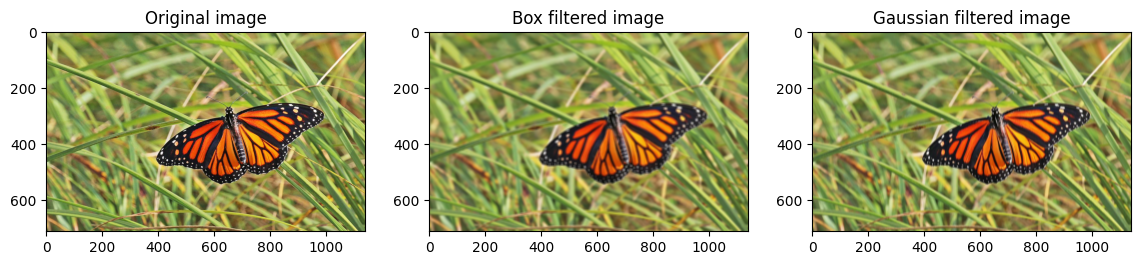

In [55]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread(r'./Images/butterfly.jpg')

# using box kernal for bluring
box_kernal = np.ones((9, 9), np.int8)/81
img_box_blured = cv.filter2D(img, -1, box_kernal)

# using gaussian kernal for bluring
sigma = 4
gaussian_kernal = cv.getGaussianKernel(9, sigma)
img_gaussian_blured = cv.filter2D(img, -1, gaussian_kernal)

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original image")
ax[1].imshow(cv.cvtColor(img_box_blured, cv.COLOR_BGR2RGB))
ax[1].set_title("Box filtered image")
ax[2].imshow(cv.cvtColor(img_gaussian_blured, cv.COLOR_BGR2RGB))
ax[2].set_title("Gaussian filtered image")
plt.plot()

#### Creating a Gaussian kernal

The 2D Gaussian function,

$$
G(x, y) = \frac{1}{2\pi \sigma_x \sigma_y} \cdot \exp\left(-\left[\frac{(x - \mu_x)^2}{2\sigma_x^2} + \frac{(y - \mu_y)^2}{2\sigma_y^2}\right]\right)
$$

$$
G(x, y) = \frac{1}{2\pi\sigma^2} \cdot e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

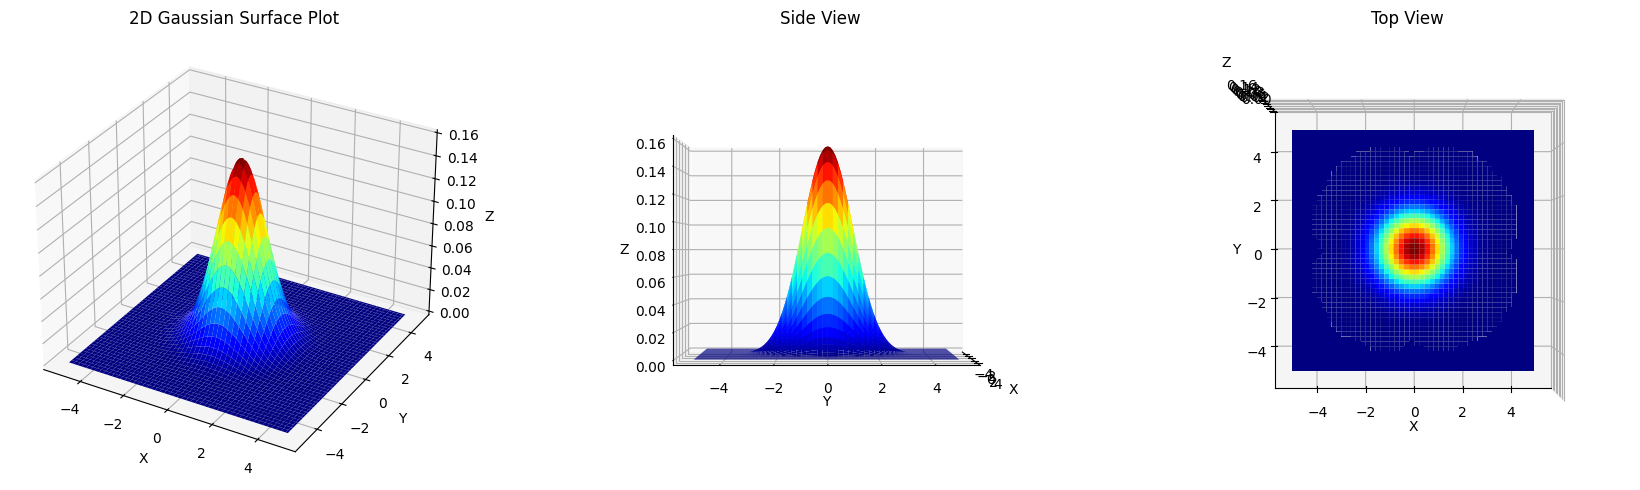

In [56]:
from mpl_toolkits.mplot3d import Axes3D

sigma = 1
spatial_resolution = 0.1
x = np.arange(-5, 5, spatial_resolution)
y = np.arange(-5, 5, spatial_resolution)
X, Y = np.meshgrid(x, y)
Z = (1/(2*np.pi*sigma**2)*np.exp(-(X**2+Y**2)/(2*sigma**2)))

fig = plt.figure(figsize=(18, 5))

# main view
ax = fig.add_subplot(1, 3, 1, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='jet')
ax.set_title("2D Gaussian Surface Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# side view
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
surf2 = ax2.plot_surface(X, Y, Z, cmap='jet')
ax2.view_init(elev=0, azim=0)  # side view from the x-direction
ax2.set_title("Side View")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")

# top view
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
surf3 = ax3.plot_surface(X, Y, Z, cmap='jet')
ax3.view_init(elev=90, azim=-90)  # directly overhead
ax3.set_title("Top View")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")

plt.tight_layout()
plt.show()

#### Sobel kernals

The Sobel operator uses two 3 x 3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical.

**Horizontal Sobel Kernel (Gx):**

$$
G_x = 
\begin{bmatrix}
-1 & 0 & +1 \\
-2 & 0 & +2 \\
-1 & 0 & +1 \\
\end{bmatrix}
$$

**Vertical Sobel Kernel (Gy):**

$$
G_y = 
\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
+1 & +2 & +1 \\
\end{bmatrix}
$$

The gradient magnitude at each pixel is typically calculated as:

$$
G = \sqrt{G_x^2 + G_y^2}
$$


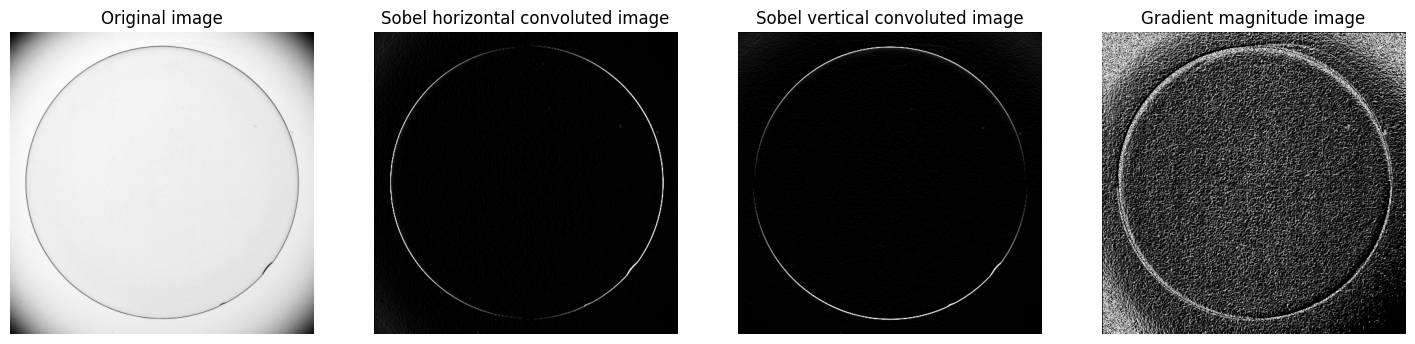

In [57]:
img = cv.imread(r'./Images/contact_lens.tif', cv.IMREAD_REDUCED_GRAYSCALE_2)

# defining horizontal and vertical sobel kernals
horizontal_sobel_kernal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # enhances vertical lines
vertical_sobel_kernal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) # enhances horizontal lines

img_horizontal_sobel = cv.filter2D(img, -1, horizontal_sobel_kernal)
img_vertical_sobel = cv.filter2D(img, -1, vertical_sobel_kernal)
grad_mag_img = np.sqrt(img_horizontal_sobel**2 + img_vertical_sobel**2)

fig, ax = plt.subplots(1, 4, figsize=(18, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(img_horizontal_sobel, cmap='gray')
ax[1].set_title("Sobel horizontal convoluted image")
ax[1].axis("off")
ax[2].imshow(img_vertical_sobel, cmap='gray')
ax[2].set_title("Sobel vertical convoluted image")
ax[2].axis("off")
ax[3].imshow(grad_mag_img, cmap='gray')
ax[3].set_title("Gradient magnitude image")
ax[3].axis("off")
plt.show()

#### Image sharpening

Can use a typical 3×3 sharpening kernel,

$$
K = 
\begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0 \\
\end{bmatrix}
$$

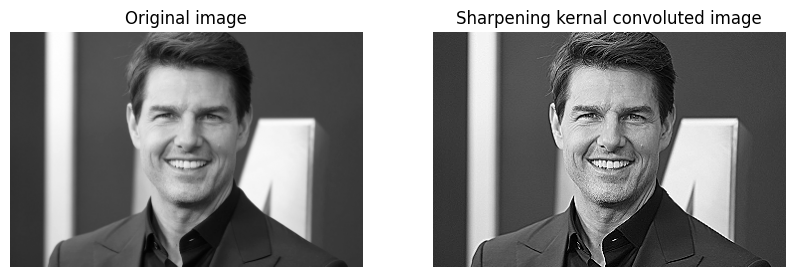

In [63]:
img = cv.imread(r'./Images/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

sharpening_kernal = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_kernal_sharpened = cv.filter2D(img, -1, sharpening_kernal)

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(img_kernal_sharpened, cmap='gray')
ax[1].set_title("Sharpening kernal convoluted image")
ax[1].axis("off")
plt.show()

Can use Unsharp masking method,  

this is a popular technique for image sharpening. Despite the name, it actually sharpens an image by subtracting a blurred version of the image from the original, then adding the result back to the original.

$$
\text{Sharpened Image} = I + \alpha (I - I_{\text{blurred}})
$$

$$
\text{Sharpened Image} = (1 + \alpha) I - \alpha I_{\text{blurred}}
$$

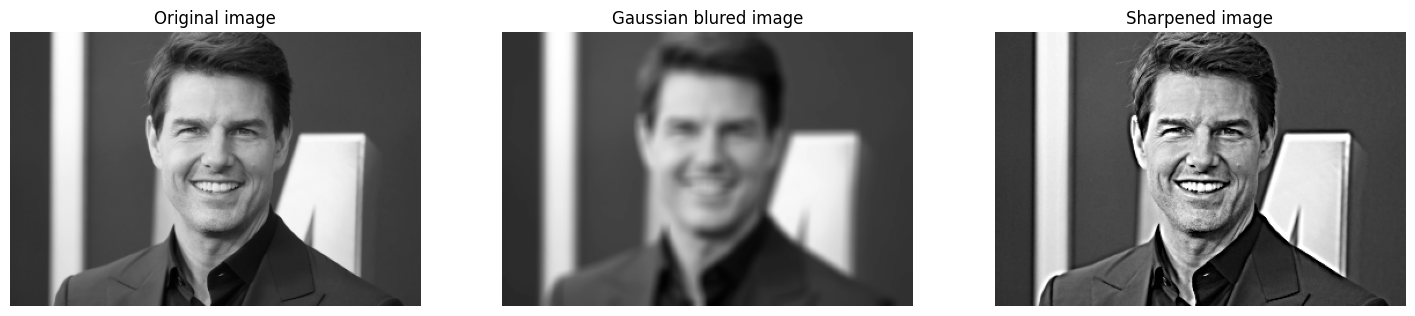

In [96]:
# applying gaussian blur
sigma = 10
blurred_img = cv.GaussianBlur(img, (9, 9), sigma)

# using unsharp masking
alpha = 1.5
sharpened_img = cv.addWeighted(img, 1 + alpha, blurred_img, -alpha, 0)

fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ax[0].imshow(img, cmap='gray')
ax[0].set_title("Original image")
ax[0].axis("off")
ax[1].imshow(blurred_img, cmap='gray')
ax[1].set_title("Gaussian blured image")
ax[1].axis("off")
ax[2].imshow(sharpened_img, cmap='gray')
ax[2].set_title("Sharpened image")
ax[2].axis("off")
plt.show()